In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.linear_model import LogisticRegression
irisdata = pd.read_csv('iris.csv', names=['длина чашелистика', 'ширина чашелистика', 
                                          'длина лепестка', 'ширина лепестка', 'класс'])
irisdata.sample(n =10)

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
20,5.4,3.4,1.7,0.2,Iris-setosa
102,7.1,3.0,5.9,2.1,Iris-virginica
126,6.2,2.8,4.8,1.8,Iris-virginica
34,4.9,3.1,1.5,0.1,Iris-setosa
45,4.8,3.0,1.4,0.3,Iris-setosa
145,6.7,3.0,5.2,2.3,Iris-virginica
94,5.6,2.7,4.2,1.3,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
120,6.9,3.2,5.7,2.3,Iris-virginica
70,5.9,3.2,4.8,1.8,Iris-versicolor


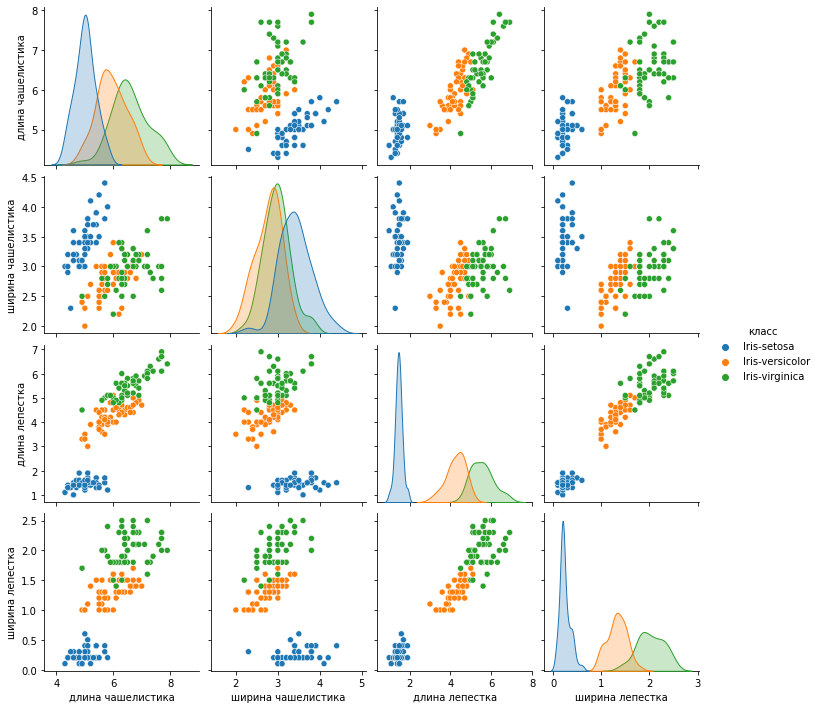

In [2]:
sns.pairplot(irisdata, hue='класс')
plt.show()

In [3]:
irisdata.sample(n = 10)

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
61,5.9,3.0,4.2,1.5,Iris-versicolor
106,4.9,2.5,4.5,1.7,Iris-virginica
82,5.8,2.7,3.9,1.2,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor
117,7.7,3.8,6.7,2.2,Iris-virginica
20,5.4,3.4,1.7,0.2,Iris-setosa
53,5.5,2.3,4.0,1.3,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor
115,6.4,3.2,5.3,2.3,Iris-virginica
138,6.0,3.0,4.8,1.8,Iris-virginica


In [4]:
binary_irisdata = irisdata.drop(index = irisdata.index[irisdata['класс'] == 'Iris-setosa'])

In [5]:
binary_irisdata.head(n = 30)

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


In [6]:
binary_irisdata.loc[binary_irisdata['класс'] == 'Iris-versicolor', binary_irisdata.columns == 'класс'] = -1
binary_irisdata.loc[binary_irisdata['класс'] == 'Iris-virginica', binary_irisdata.columns == 'класс'] = 1

In [7]:
binary_irisdata.sample(n = 10)

,длина чашелистика,ширина чашелистика,длина лепестка,ширина лепестка,класс
50,7.0,3.2,4.7,1.4,-1
137,6.4,3.1,5.5,1.8,1
80,5.5,2.4,3.8,1.1,-1
73,6.1,2.8,4.7,1.2,-1
102,7.1,3.0,5.9,2.1,1
115,6.4,3.2,5.3,2.3,1
63,6.1,2.9,4.7,1.4,-1
101,5.8,2.7,5.1,1.9,1
124,6.7,3.3,5.7,2.1,1
99,5.7,2.8,4.1,1.3,-1


In [26]:
X = binary_irisdata.loc[:, binary_irisdata.columns != 'класс'].values
y = binary_irisdata.loc[:, binary_irisdata.columns == 'класс'].values.T

In [27]:
y

array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=object)

In [9]:
X = np.array(np.hstack([X, np.ones([len(X), 1])]), dtype = np.float64)
Y = np.array(y, dtype = np.int64)

In [10]:
my_model =LogisticRegression(random_state = 0, max_iter=2000)

In [11]:
a = my_model.fit(X, Y)

In [12]:
my_model.coef_

array([[-3.94426322e-01, -5.13378130e-01,  2.93108661e+00,
         2.41670685e+00, -5.18829571e-04]])

[[-0.11797383 -0.7999214   1.        ]
 [-0.51063101  0.1204466   1.        ]
 [-0.066221   -1.48863894  1.        ]
 [-0.52495579 -1.0756786   1.        ]
 [-1.05160943 -0.79470075  1.        ]
 [-0.92797821 -0.27286325  1.        ]
 [-0.61948114 -0.93916249  1.        ]
 [-0.77806838 -0.83316284  1.        ]
 [-0.25296046 -1.10257913  1.        ]
 [-0.84346615 -1.42704787  1.        ]
 [-2.27649491 -0.6731907   1.        ]
 [-0.5677819  -1.37108251  1.        ]
 [ 0.13487731 -1.72718284  1.        ]
 [-0.97712074 -1.09359193  1.        ]
 [-0.23361039 -0.26532062  1.        ]
 [-0.92252629 -0.81091874  1.        ]
 [-1.44389287 -1.99039823  1.        ]
 [-1.17395607 -0.92182552  1.        ]
 [-0.38485466 -0.39881008  1.        ]
 [-1.19366341 -1.15115138  1.        ]
 [-1.52427648 -1.71000897  1.        ]
 [-1.8531351  -0.0246123   1.        ]
 [-1.25482609 -1.21903715  1.        ]
 [-1.62639768 -0.61125482  1.        ]
 [-1.80694892 -1.10637014  1.        ]
 [-1.44773328 -0.80654875

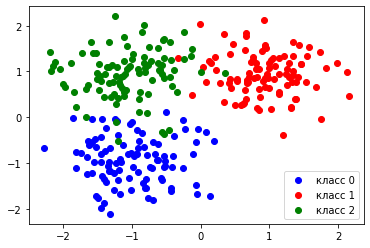

In [153]:
np.random.seed(0)
l = 100
n = 2
X1 = np.array([[-1,-1]]) + 0.5*np.random.randn(l, n)
X2 = np.array([[1,1]]) + 0.5*np.random.randn(l, n)
X3 = np.array([[-1,1]]) + 0.5*np.random.randn(l, n)
X1 = np.hstack([X1, np.ones([l, 1])])
X2 = np.hstack([X2, np.ones([l, 1])])
X3 = np.hstack([X3, np.ones([l, 1])])
X = np.vstack([X1, X2, X3])
y = np.hstack([[0]*l, [1]*l, [2]*l])
print(X)
cols = ['blue', 'red', 'green']

# построение точек
for k in np.unique(y):
    plt.scatter(X[y==k][:,0], X[y==k][:, 1],  label='класс {}'.format(k), color=cols[k])

plt.legend(loc='best')
plt.show()

In [154]:
models = []
model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept = False)
q1 = model.fit(X, np.array(y==0, dtype=np.int64))
print(model.coef_)
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept = False)
q2 = model.fit(X, np.array(y==1, dtype=np.int64))
print(model.coef_)
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept = False)
q3 = model.fit(X, np.array(y==2, dtype=np.int64))
print(model.coef_)
models.append(model)

[[-0.74102465 -4.10730758 -0.87947999]]
[[ 4.25046935  0.90205123 -0.87393578]]
[[-2.53143986  2.57397612 -3.12551399]]


[-0.74102465 -4.10730758 -0.87947999]
-5.542740817126835 1

[ 4.25046935  0.90205123 -0.87393578]
-0.21222391175493494 1

[-2.53143986  2.57397612 -3.12551399]
1.0168031863133289 1



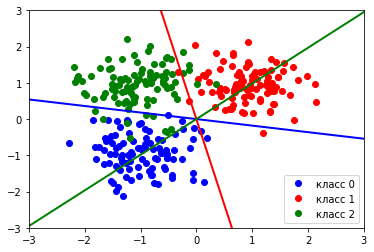

In [156]:
cols = ['blue', 'red', 'green']
plt.xlim(-3, 3)
plt.ylim(-3, 3)
# построение точек
for k in range(0, 3):
    plt.plot(X[y==k,0], X[y==k,1], 'o', label='класс {}'.format(k), color=cols[k])

# построение прямой перпендикулярной к разделяющей
for k in range(0, 3):
    # нормальный вектор к прямой
    print(models[k].coef_[0])
    x2, y2 = -models[k].coef_[0][1]/models[k].coef_[0][0], 1
    print(x2, y2)
    print('')
    polynomial = np.poly1d(np.polyfit([0, x2], [0, y2], 1))
    x_axis = np.linspace(-3, 3, 10)
    y_axis = polynomial(x_axis)
    plt.plot(x_axis, y_axis, linewidth=2, color=cols[k])

plt.legend(loc='best')
plt.show()